In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c94c2de414882947206b4f0a7f4989c8


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nizwa
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | cassilandia
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | pouebo
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | koslan
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | vila franca do campo
Processing Record 10 of Set 1 | nadym
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | ribeira brava
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 18 of Set 1 | los llanos de aridane
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | stafford
Processing Record 21 of Set 1 | agadir
Processing Record 22 of Set 1 | bengkulu
Processing Record

Processing Record 42 of Set 4 | puri
Processing Record 43 of Set 4 | bismarck
Processing Record 44 of Set 4 | flinders
Processing Record 45 of Set 4 | nome
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | nyuksenitsa
Processing Record 48 of Set 4 | barranca
Processing Record 49 of Set 4 | barquisimeto
Processing Record 50 of Set 4 | sindand
City not found. Skipping...
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | othonoi
City not found. Skipping...
Processing Record 3 of Set 5 | azad shahr
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | quatre cocos
Processing Record 7 of Set 5 | jiroft
City not found. Skipping...
Processing Record 8 of Set 5 | batagay
Processing Record 9 of Set 5 | kazachinskoye
Processing Record 10 of Set 5 | paveh
Processing Record 11 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 5 | jinchengjiang
City not found. Skipping..

Processing Record 31 of Set 8 | xichang
Processing Record 32 of Set 8 | tynda
Processing Record 33 of Set 8 | escanaba
Processing Record 34 of Set 8 | wanderlandia
City not found. Skipping...
Processing Record 35 of Set 8 | buritis
Processing Record 36 of Set 8 | majitha
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | vikulovo
Processing Record 39 of Set 8 | strezhevoy
Processing Record 40 of Set 8 | bara
Processing Record 41 of Set 8 | pitkyaranta
Processing Record 42 of Set 8 | fukue
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | etchoropo
Processing Record 45 of Set 8 | balezino
Processing Record 46 of Set 8 | sande
Processing Record 47 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 8 | necochea
Processing Record 49 of Set 8 | paamiut
Processing Record 50 of Set 8 | saint-denis
Processing Record 1 of Set 9 | cavalcante
Processing Record 2 of Set 9 | baruun-urt
Processing Record 3 of Set 9 | ca

Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | ola
Processing Record 21 of Set 12 | ocho rios
Processing Record 22 of Set 12 | aquiraz
Processing Record 23 of Set 12 | lapi
Processing Record 24 of Set 12 | mahabaleshwar
Processing Record 25 of Set 12 | kibala
Processing Record 26 of Set 12 | sartana
Processing Record 27 of Set 12 | gumdag
Processing Record 28 of Set 12 | dongsheng
Processing Record 29 of Set 12 | arlit
Processing Record 30 of Set 12 | saint-augustin
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | baker city
Processing Record 33 of Set 12 | bubaque
Processing Record 34 of Set 12 | diego de almagro
Processing Record 35 of Set 12 | winnemucca
Processing Record 36 of Set 12 | nkwerre
Processing Record 37 of Set 12 | marabba
Processing Record 38 of Set 12 | jiddah
City not found. Skipping...
Processing Record 39 of Set 12 | minot
Processing Record 40 of Set 12 | toliary
City not found. Skipping...
Processing Record 41

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nizwa,22.93,57.53,67.66,25,0,6.33,OM,2020-10-24 21:48:32
1,New Norfolk,-42.78,147.06,48.00,62,4,1.99,AU,2020-10-24 21:48:32
2,Cassilandia,-19.11,-51.73,80.02,60,94,3.74,BR,2020-10-24 21:48:32
3,Upernavik,72.79,-56.15,22.78,95,100,10.67,GL,2020-10-24 21:48:33
4,Pouebo,-20.40,164.57,78.91,68,11,12.66,NC,2020-10-24 21:48:33
5,Georgetown,5.41,100.34,78.80,88,20,3.36,MY,2020-10-24 21:44:59
6,Koslan,63.46,48.90,27.01,97,93,8.75,RU,2020-10-24 21:48:33
7,Vila Franca Do Campo,37.72,-25.43,68.00,82,75,17.22,PT,2020-10-24 21:48:33
8,Nadym,65.53,72.52,14.40,95,82,8.55,RU,2020-10-24 21:48:33
9,Ushuaia,-54.80,-68.30,48.20,57,75,13.87,AR,2020-10-24 21:46:04


In [16]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nizwa,OM,2020-10-24 21:48:32,22.93,57.53,67.66,25,0,6.33
1,New Norfolk,AU,2020-10-24 21:48:32,-42.78,147.06,48.00,62,4,1.99
2,Cassilandia,BR,2020-10-24 21:48:32,-19.11,-51.73,80.02,60,94,3.74
3,Upernavik,GL,2020-10-24 21:48:33,72.79,-56.15,22.78,95,100,10.67
4,Pouebo,NC,2020-10-24 21:48:33,-20.40,164.57,78.91,68,11,12.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

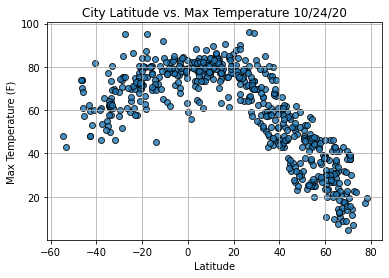

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

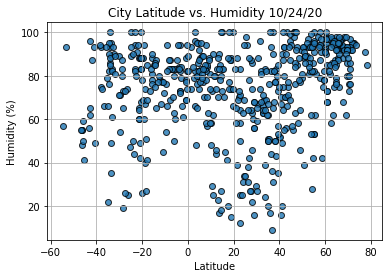

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


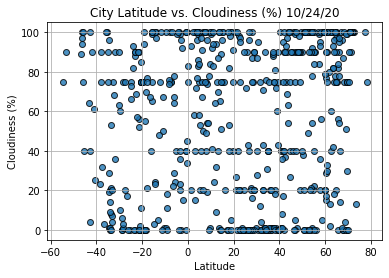

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

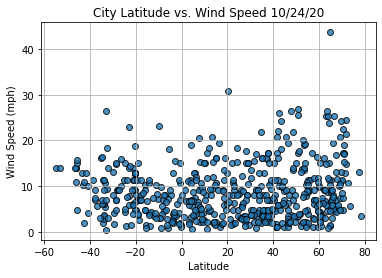

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()